In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from dataclasses import dataclass
from scipy.stats import multivariate_normal as mvn

import vsem
from vsem_inv_prob import InvProb

In [2]:
rng = np.random.default_rng(6435)

class TestPrior:
    def __init__(self, rng, dim: int):
        self.rng = rng
        self._dim = dim

    @property
    def dim(self):
        return self._dim

    def sample(self, n=1):
        samp = self.rng.uniform(size=(n, self.dim))

        if n == 1:
            return samp[0,:]
        else:
            return samp 

    def log_density(self, x):
        if x.ndim == 1:
            x = x.reshape(1, -1)

        return np.zeros(x.shape[0])


class TestLikelihood:
    def __init__(self, dim):
        self._dist = mvn(np.zeros(dim))

    def log_density(self, x):
        return self._dist.logpdf(x)

In [3]:
d = 2
prior = TestPrior(rng, d)
likelihood = TestLikelihood(d)

In [4]:
inv_prob = InvProb(rng, prior, likelihood)

In [ ]:
samp, trace_plot = inv_prob.sample_posterior(n_samp=10000)
display(trace_plot)

# Forward Model

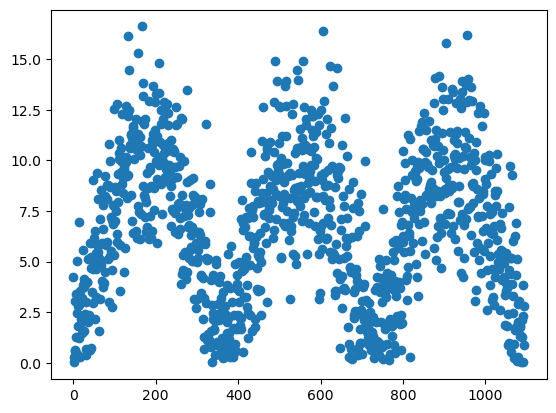

In [3]:
n_days = 365 * 3
time_steps, driver = vsem.get_PAR_driver(n_days, rng)

plt.plot(time_steps, driver, "o")
plt.show()

In [4]:
par_names = ["KEXT", "Av"]
forward_model = vsem.get_vsem_fwd_model(driver, par_names, simplify=False)

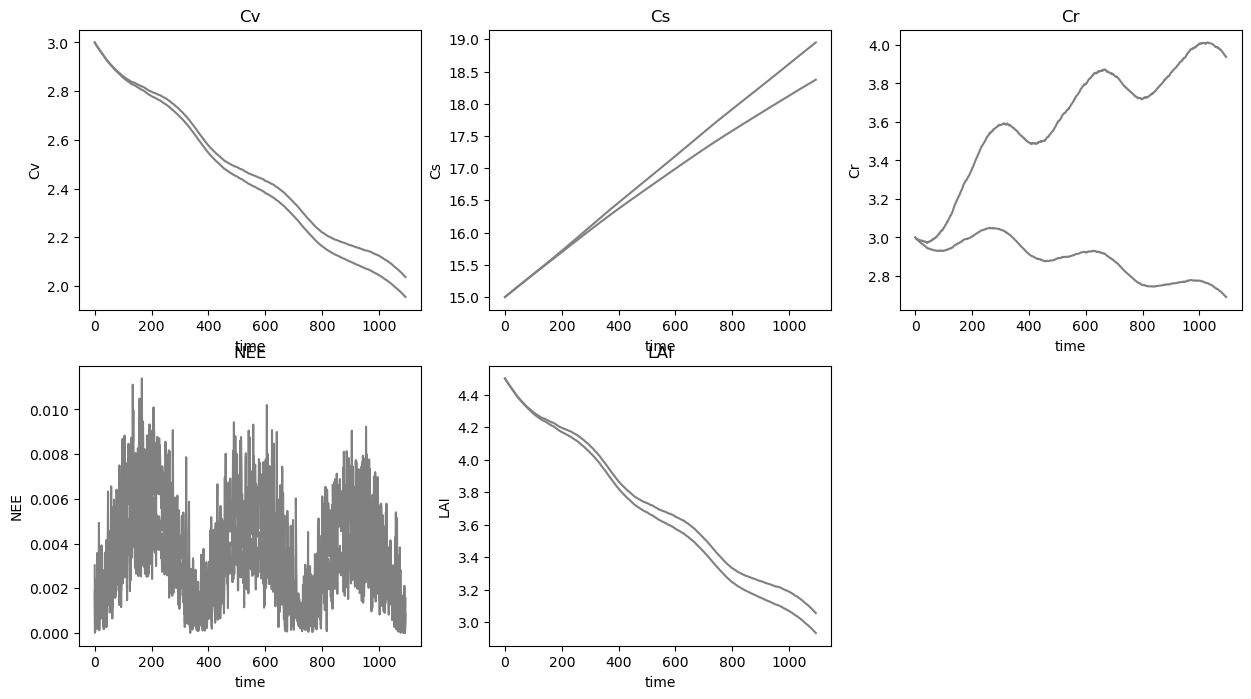

In [5]:
par = np.array([[0.2, 0.2], [0.1, 0.3]])
output = forward_model(par)
vsem_plot = vsem.plot_vsem_outputs(output, nrows=2)

display(vsem_plot)

In [10]:
output.shape

(1, 1095, 5)